# 1. Some Brief EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

condition = pd.read_csv("../data/condition/condition_1.csv")
condition.head(), condition.shape

(             timestamp        date  activity
 0  2003-05-07 12:00:00  2003-05-07         0
 1  2003-05-07 12:01:00  2003-05-07       143
 2  2003-05-07 12:02:00  2003-05-07         0
 3  2003-05-07 12:03:00  2003-05-07        20
 4  2003-05-07 12:04:00  2003-05-07       166,
 (23244, 3))

In [2]:
def plot_activity_freq(data, min_frequency):
        activity_frequency = data.activity.value_counts()
        activity_frequency_nooutlier = activity_frequency[(activity_frequency > min_frequency) & (activity_frequency.index != 0)]
        plt.bar(x=activity_frequency_nooutlier.index, 
                height=activity_frequency_nooutlier, 
                width=2,
                log=True)
        plt.xlabel("Hourly Recorded Activity")
        plt.ylabel("# of Occurences")

In [ ]:
scores_df = pd.read_csv("../data/scores.csv", index_col='number')
scores_df.head()

,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
number,,,,,,,,,,,
condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


number
condition_8      5
condition_6      7
control_1        8
control_10       8
control_21       8
control_17       9
control_30       9
condition_10     9
condition_7     11
condition_1     11
control_15      11
control_3       12
condition_12    12
condition_9     13
condition_15    13
condition_5     13
control_8       13
control_7       13
control_5       13
control_6       13
control_9       13
condition_21    13
control_4       13
condition_18    13
control_13      13
control_16      13
control_14      13
condition_20    13
condition_17    13
condition_19    13
condition_3     13
condition_4     13
control_31      13
control_26      13
control_29      13
control_27      13
control_24      13
control_23      13
control_25      13
control_11      13
control_22      13
control_18      13
control_19      13
control_20      13
condition_14    14
condition_13    14
condition_22    14
condition_11    14
control_12      14
control_32      14
condition_16    16
condition_23    16
contr

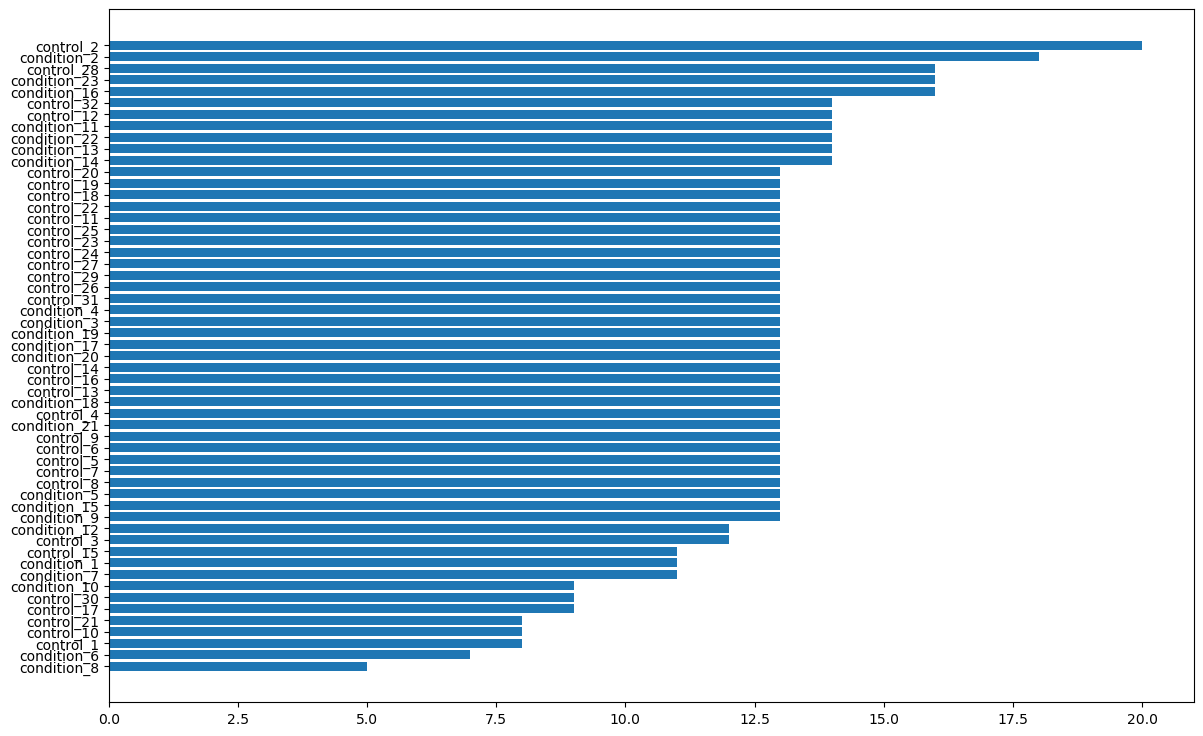

In [4]:
scores_days_sorted = scores_df.days.sort_values()
plt.figure(figsize=(14,9))
plt.barh(y=scores_days_sorted.index, width=scores_days_sorted)
print(scores_days_sorted)

In [5]:
import datetime

def encode_time(df):
    df = df.copy()
    df['time_parsed'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%d %H:%M:%S")
    df['day_of_week'] = df.time_parsed.dt.dayofweek
    df['hour'] = df.time_parsed.dt.hour
    return df

condition_parsed = encode_time(condition)
condition_parsed

,timestamp,date,activity,time_parsed,day_of_week,hour
0,2003-05-07 12:00:00,2003-05-07,0,2003-05-07 12:00:00,2,12
1,2003-05-07 12:01:00,2003-05-07,143,2003-05-07 12:01:00,2,12
2,2003-05-07 12:02:00,2003-05-07,0,2003-05-07 12:02:00,2,12
3,2003-05-07 12:03:00,2003-05-07,20,2003-05-07 12:03:00,2,12
4,2003-05-07 12:04:00,2003-05-07,166,2003-05-07 12:04:00,2,12
...,...,...,...,...,...,...
23239,2003-05-23 15:19:00,2003-05-23,0,2003-05-23 15:19:00,4,15
23240,2003-05-23 15:20:00,2003-05-23,0,2003-05-23 15:20:00,4,15
23241,2003-05-23 15:21:00,2003-05-23,0,2003-05-23 15:21:00,4,15
23242,2003-05-23 15:22:00,2003-05-23,0,2003-05-23 15:22:00,4,15


<BarContainer object of 7 artists>

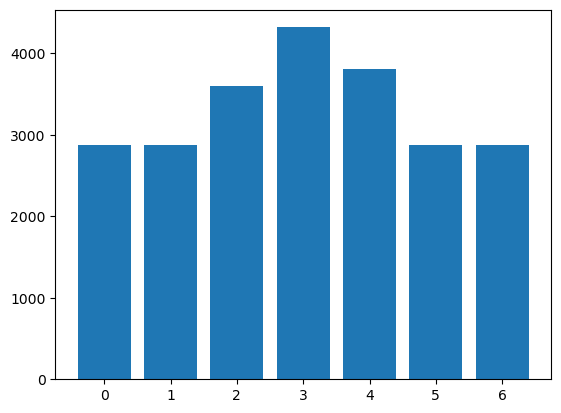

In [6]:

weekday_counts = condition_parsed.day_of_week.value_counts()
plt.bar(x=weekday_counts.index, height=weekday_counts)

In [7]:
weekday_counts

day_of_week
3    4320
4    3804
2    3600
5    2880
6    2880
0    2880
1    2880
Name: count, dtype: int64

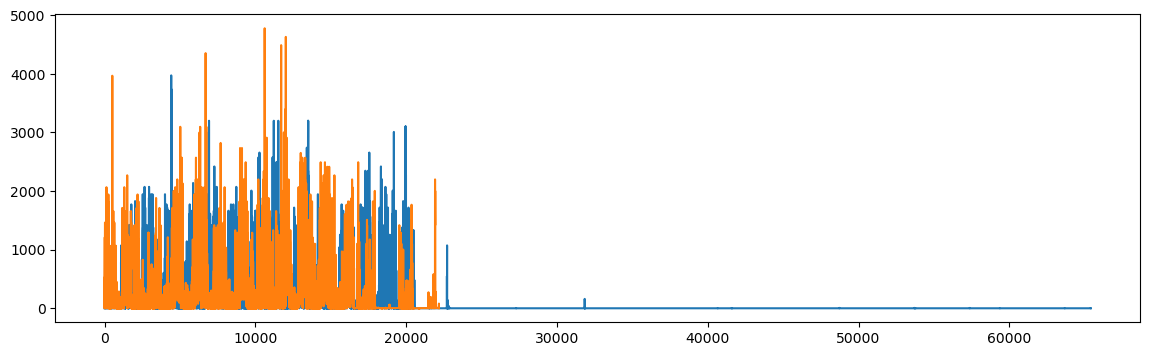

In [ ]:
condition = pd.read_csv("../data/condition/condition_7.csv")
control = pd.read_csv("../data/control/control_3.csv")

plt.figure(figsize=(14,4))
plt.plot(control.index, control.activity)
plt.plot(condition.index, condition.activity)

# 2. Data Processing

In [9]:
# afftype (1: bipolar II, 2: unipolar depressive, 3: bipolar I)
# melanch (1: melancholia, 2: no melancholia)

class_to_idx = { "no depression":0, "depression": 1}

In [ ]:
import torch
import torch.nn as nn
import math
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler

import os
import pandas as pd

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# defines the number of columns(minutes) per row of data
MINUTES_PER_INPUT = 64
scaler = MinMaxScaler(feature_range=(0,1))
scale_range = torch.tensor([0,500])
scaler.fit(scale_range.reshape(-1,1))

class ActigraphDataset(Dataset):
    def __init__(self, annotations_file, data_dir):
        self.data_dir = data_dir
        self.labels = pd.read_csv(annotations_file)[['number', 'afftype']].fillna(0)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        data_path = os.path.join(self.data_dir, self.labels.iloc[idx, 0] + ".csv")
        data = pd.read_csv(data_path)['activity']
        # chop data to 1 days only
        data = data.iloc[0:18000]
        data = scaler.transform(data.to_numpy().reshape(-1,1)).squeeze()
        data_tensor = torch.from_numpy(data).float()

        # pads data tensor to be a nice multiple of MINUTES_PER_INPUT
        new_shape = math.ceil(data_tensor.shape[0] / MINUTES_PER_INPUT)
        padding = new_shape * MINUTES_PER_INPUT - data_tensor.shape[0]
        p = nn.ZeroPad1d((0,padding))
        data_padded = p(data_tensor)

        # reshapes data tensor to be N x 1 x L x MINUTES_PER_INPUT
        data_reshaped = torch.reshape(data_padded, (new_shape, MINUTES_PER_INPUT)).unsqueeze(dim=0)
        label = int(self.labels.iloc[idx, 1].item())
        # change label encoding to binary
        label = 1 if label > 0 else 0
        return data_reshaped, float(label)

train_dataset = ActigraphDataset(
    annotations_file = "data/scores.csv",
    data_dir = "data/all"
)
test_dataset = ActigraphDataset(
    annotations_file = "data/test_labels.csv",
    data_dir = "data/test/"
)

train_dataloader = DataLoader(
    dataset = train_dataset,
    batch_size = 32,
    shuffle = True,
)
test_dataloader = DataLoader(
    dataset = test_dataset,
    batch_size = 1,
    shuffle = True,
)

# data, label = train_dataset[0]

idx, (data, label) = next(enumerate(train_dataloader))
data.shape, label.dtype

(torch.Size([32, 1, 282, 64]), torch.float64)

# 3. Model Architecture

In [141]:
from torch import nn

class LSTM_v0(nn.Module):
    def __init__(self, in_shape, out_shape, hidden_shape, lstm_layers):
        super().__init__()
        self.in_shape = in_shape
        self.out_shape = out_shape
        self.hidden_shape = hidden_shape
        self.lstm_layers = lstm_layers
        
        # N * 1 * L * in_shape
        self.norm = nn.BatchNorm2d(num_features=1)
        # hidden shape = number of Long term memory values
        self.lstm = nn.LSTM(in_shape, hidden_shape, lstm_layers)
        self.fc = nn.Sequential(
            # nn.Linear(hidden_shape, hidden_shape),
            # nn.ReLU(),
            nn.Linear(hidden_shape, out_shape)
        )
    def forward(self, x, h0, c0):
        # number of LSTM layers * L * hidden shape
        if h0 is None or c0 is None:
            h0 = torch.zeros(self.lstm_layers, 
                                    x.size(2), 
                                    self.hidden_shape).to(x.device)
            c0 = torch.zeros(self.lstm_layers, 
                                    x.size(2), 
                                    self.hidden_shape).to(x.device)
        # print(x.shape)
        x = x.squeeze(dim=1)
        # print(x.shape)
        x, (hn, cn) = self.lstm(x, (h0, c0))
        # print(f"{x.shape} | {hn.shape} | {cn.shape}")
        x = self.fc(x[:, -1, :])
        # print(x.shape)
        return x, (hn, cn)
    
IN_SHAPE = MINUTES_PER_INPUT
OUT_SHAPE = 1
HIDDEN_SHAPE = 128
LSTM_LAYERS = 8

model_0 = LSTM_v0(IN_SHAPE, OUT_SHAPE, HIDDEN_SHAPE, LSTM_LAYERS).to(device)
model_0.state_dict()

OrderedDict([('norm.weight', tensor([1.], device='cuda:0')),
             ('norm.bias', tensor([0.], device='cuda:0')),
             ('norm.running_mean', tensor([0.], device='cuda:0')),
             ('norm.running_var', tensor([1.], device='cuda:0')),
             ('norm.num_batches_tracked', tensor(0, device='cuda:0')),
             ('lstm.weight_ih_l0',
              tensor([[ 0.0046,  0.0863,  0.0249,  ...,  0.0391,  0.0128, -0.0387],
                      [-0.0369,  0.0172, -0.0206,  ..., -0.0683, -0.0704, -0.0253],
                      [-0.0058,  0.0253,  0.0293,  ...,  0.0641, -0.0136,  0.0053],
                      ...,
                      [ 0.0441,  0.0118,  0.0054,  ...,  0.0497,  0.0422,  0.0741],
                      [ 0.0333, -0.0407, -0.0353,  ...,  0.0640, -0.0326,  0.0350],
                      [ 0.0204,  0.0414, -0.0604,  ...,  0.0088,  0.0326, -0.0009]],
                     device='cuda:0')),
             ('lstm.weight_hh_l0',
              tensor([[-0.0605, -0

## 4. Testing and Training

In [142]:
h0_temp = None
c0_temp = None
idx, (temp_x, temp_y) = next(enumerate(test_dataloader))
with torch.inference_mode():
    result, (hn, cn) = model_0(temp_x.to(device), h0_temp, c0_temp)
result

tensor([[-0.0547]], device='cuda:0')

In [143]:
from torchmetrics import Accuracy, F1Score

optimizer = torch.optim.Adam(params = model_0.parameters(),
                            lr=0.01)
loss_fn = nn.BCEWithLogitsLoss().to(device)
acc_fn = Accuracy(task='binary').to(device)
f1_fn = F1Score(task='binary').to(device)


In [144]:
def train_step(model: nn.Module,
              dataloader: DataLoader,
              loss_fn: torch.nn,
              acc_fn: Accuracy,
              f1_fn: F1Score,
              optimizer: torch.optim,
              device: str,
              h0: torch.tensor,
              c0: torch.tensor):
    model.train()
    # initialize metrics
    loss, acc, f1 = 0, 0, 0

    for i, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # forward pass
        logits, (h0, c0) = model(X, h0, c0)
        preds = torch.round(logits).squeeze(dim=1)

        # print(f"{logits.squeeze(dim=1)}, {preds}")
        batch_loss = loss_fn(logits.squeeze(dim=1), y)
        batch_acc = acc_fn(preds, y)
        batch_f1 = f1_fn(preds, y)
        loss += batch_loss
        acc += batch_acc
        f1 += batch_f1

        # backpropagate + optimize
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()

        h0 = h0.detach()
        c0 = c0.detach()

    return loss / len(dataloader), acc / len(dataloader), f1 / len(dataloader)

In [145]:
def test_step(model: nn.Module,
              dataloader: DataLoader,
              loss_fn: torch.nn,
              acc_fn: Accuracy,
              f1_fn: F1Score,
              device: str,
              h0: torch.tensor,
              c0: torch.tensor):
    model.eval()
    loss, acc, f1 = 0, 0, 0
    
    for i, (X, y) in enumerate(dataloader):
        with torch.inference_mode():
            X, y = X.to(device), y.to(device)

            logits, _ = model(X, h0, c0)
            preds = torch.round(logits).squeeze(dim=1)

            # print(f"{i}{logits.squeeze(dim=1)}, {y.dtype}")
            batch_loss = loss_fn(logits.squeeze(dim=1), y)
            batch_acc = acc_fn(preds, y)
            batch_f1 = f1_fn(preds, y)

            loss += batch_loss
            acc += batch_acc
            f1 += batch_f1
    return loss / len(dataloader), acc / len(dataloader), f1 / len(dataloader)

h0_temp = None
c0_temp = None
test_step(model_0, test_dataloader, loss_fn, acc_fn, f1_fn, device, 
          h0_temp, c0_temp)

(tensor(0.6896, device='cuda:0', dtype=torch.float64),
 tensor(0.5714, device='cuda:0'),
 tensor(0., device='cuda:0'))

In [146]:
'''
TRAIN_LOSS, TEST_LOSS = [], []
TRAIN_ACC, TEST_ACC = [], []
TRAIN_F1, TEST_F1 = [], []
'''

'\nTRAIN_LOSS, TEST_LOSS = [], []\nTRAIN_ACC, TEST_ACC = [], []\nTRAIN_F1, TEST_F1 = [], []\n'

In [147]:
epochs = 100

MODEL = model_0
TRAIN_DATALOADER = train_dataloader
TEST_DATALOADER = test_dataloader

# metric records
train_loss, test_loss = [], []
train_acc, test_acc = [], []
train_f1, test_f1 = [], []

for epoch in range(epochs):
    tr_loss, tr_acc, tr_f1 = train_step(model=MODEL,
                                        dataloader=TRAIN_DATALOADER,
                                        loss_fn=loss_fn,
                                        acc_fn=acc_fn,
                                        f1_fn=f1_fn,
                                        optimizer=optimizer,
                                        device=device,
                                        h0=None,
                                        c0=None)
    train_loss.append(tr_loss.item())
    train_acc.append(tr_acc.item())
    train_f1.append(tr_f1.item())

    te_loss, te_acc, te_f1 = test_step(model=MODEL,
                                       dataloader=TEST_DATALOADER,
                                       loss_fn=loss_fn,
                                       acc_fn=acc_fn,
                                       f1_fn=f1_fn,
                                       device=device,
                                       h0=None,
                                       c0=None)
    test_loss.append(te_loss.item())
    test_acc.append(te_acc.item())
    test_f1.append(te_f1.item())
    print(f"Epoch: {epoch} | Train Loss: {tr_loss} | Train Acc: {tr_acc} | Test Loss: {te_loss} | Test Acc: {te_acc}")

Epoch: 0 | Train Loss: 0.7341153084610899 | Train Acc: 0.5746527910232544 | Test Loss: 0.686399078794888 | Test Acc: 0.5714285969734192
Epoch: 1 | Train Loss: 0.6806951778837376 | Train Acc: 0.6145833730697632 | Test Loss: 0.6866266546504838 | Test Acc: 0.5714285969734192
Epoch: 2 | Train Loss: 0.6925989209105157 | Train Acc: 0.5746527910232544 | Test Loss: 0.6852708735636303 | Test Acc: 0.5714285969734192
Epoch: 3 | Train Loss: 0.6809054470051907 | Train Acc: 0.6944444179534912 | Test Loss: 0.6852974178535597 | Test Acc: 0.5714285969734192
Epoch: 4 | Train Loss: 0.6428671830282029 | Train Acc: 0.6545138955116272 | Test Loss: 0.6848577122603143 | Test Acc: 0.5714285969734192


KeyboardInterrupt: 

In [ ]:

TRAIN_LOSS = train_loss.copy()
TEST_LOSS = test_loss.copy()
TRAIN_ACC = train_acc.copy()
TEST_ACC = test_acc.copy()


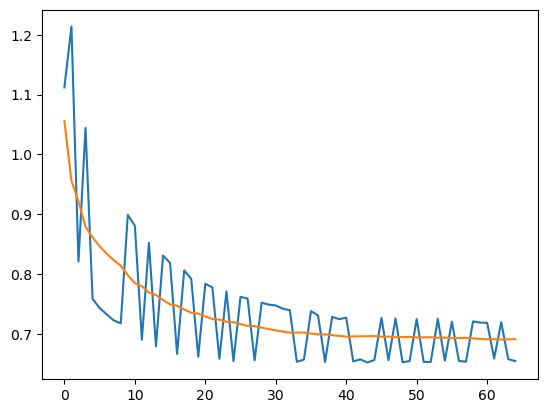

In [ ]:
plt.plot(TRAIN_LOSS)
plt.plot(TEST_LOSS)

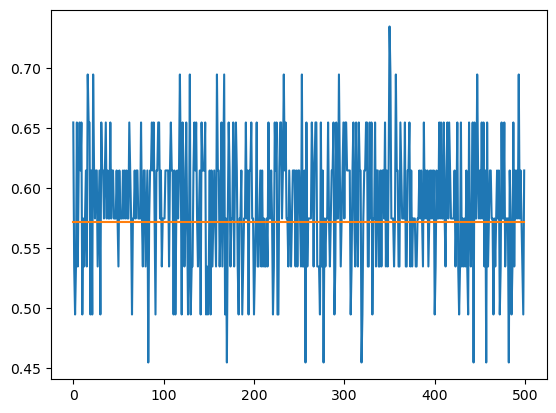

In [ ]:
plt.plot(train_acc)
plt.plot(test_acc)

In [ ]:
torch.save(model_0.state_dict(), "./models/LSTM_slowtrain_32_2_16_25.pth")